In [2]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


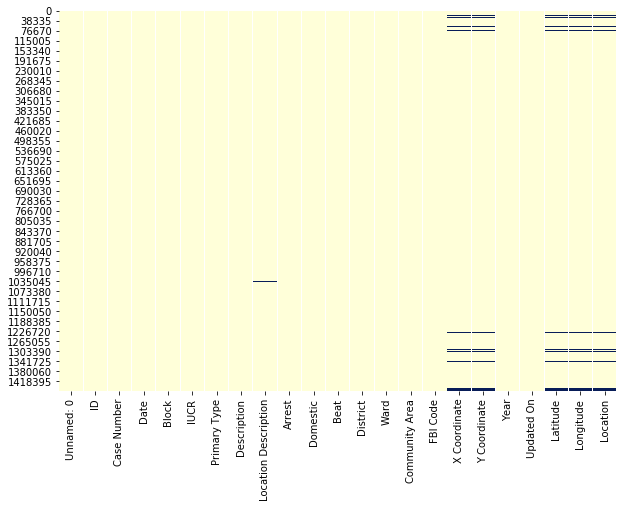

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')  #YlGnBu  viridis

In [6]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [7]:
pd.value_counts(df['Location Description'])[:10]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
Name: Location Description, dtype: int64

In [8]:
pd.value_counts(df['Primary Type'])[:20]

THEFT                               321950
BATTERY                             258941
CRIMINAL DAMAGE                     152812
NARCOTICS                           131177
ASSAULT                              89508
OTHER OFFENSE                        85361
BURGLARY                             81668
DECEPTIVE PRACTICE                   67609
MOTOR VEHICLE THEFT                  59856
ROBBERY                              56092
CRIMINAL TRESPASS                    36429
WEAPONS VIOLATION                    16983
PUBLIC PEACE VIOLATION               13015
OFFENSE INVOLVING CHILDREN           10590
PROSTITUTION                          7567
CRIM SEXUAL ASSAULT                   6298
INTERFERENCE WITH PUBLIC OFFICER      6136
SEX OFFENSE                           4491
HOMICIDE                              2590
GAMBLING                              2211
Name: Primary Type, dtype: int64

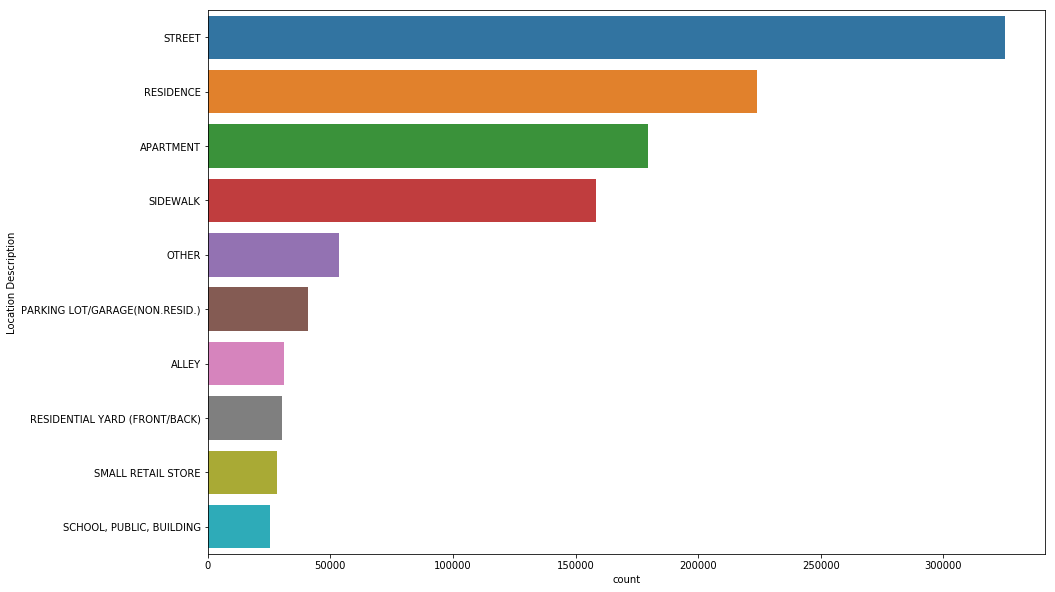

In [9]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [10]:
chicago_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11,tiles="CartoDB dark_matter")

In [11]:
locations = df.groupby('Community Area').first()

In [12]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [13]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [14]:
new_locations

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False
5.0,41.961482,-87.676856,MEDICAL/DENTAL OFFICE,False
6.0,41.949986,-87.653197,RESIDENCE PORCH/HALLWAY,False
7.0,41.927322,-87.665810,RESIDENCE-GARAGE,False
8.0,41.893027,-87.626751,SIDEWALK,True


In [15]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                aLocation Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [16]:
chicago_map

In [29]:
unique_locations = df['Location'].value_counts()

In [30]:
unique_locations.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.979006297, -87.906463155)', '(41.897895128, -87.624096605)',
       '(41.742710224, -87.634088181)', '(41.909664252, -87.742728815)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868541914, -87.639235361)', '(41.976290414, -87.905227221)',
       ...
       '(41.781020512, -87.621998216)', '(41.954064396, -87.721496295)',
       '(41.92191023, -87.67292919)', '(41.775284769, -87.638108126)',
       '(41.763657922, -87.564158841)', '(41.84096742, -87.700482349)',
       '(41.698166613, -87.542563034)', '(41.881045033, -87.699576616)',
       '(41.793020837, -87.691342697)', '(41.919719043, -87.708997288)'],
      dtype='object', length=368079)

In [31]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [32]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [33]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [34]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

# A Simple Chicago Mapping showing the total criminal rates.
( As per the number of total criminal rates)

In [35]:
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632], zoom_start=13,tiles="CartoDB dark_matter")

In [36]:
for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

In [37]:
chicago_map_crime

In [38]:
df_theft = df[df['Primary Type'] == 'THEFT']

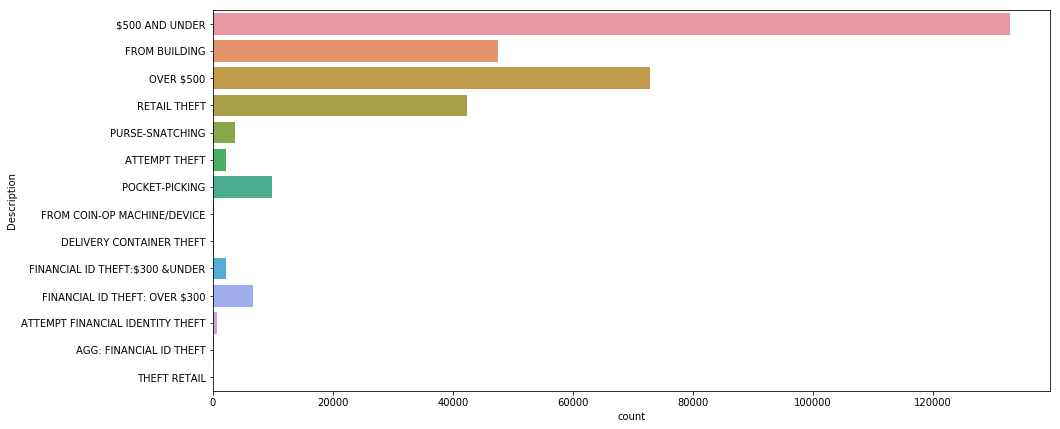

In [39]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [40]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts(), "Description" : df_theft['Description'].value_counts().index})

In [41]:
df_theft_data.reset_index(inplace=True)

In [42]:
df_theft_data = df_theft_data.drop(columns=['index'], axis = 1)
df_theft_data.head()

,Counts,Description
0,132848,$500 AND UNDER
1,72957,OVER $500
2,47527,FROM BUILDING
3,42450,RETAIL THEFT
4,9910,POCKET-PICKING


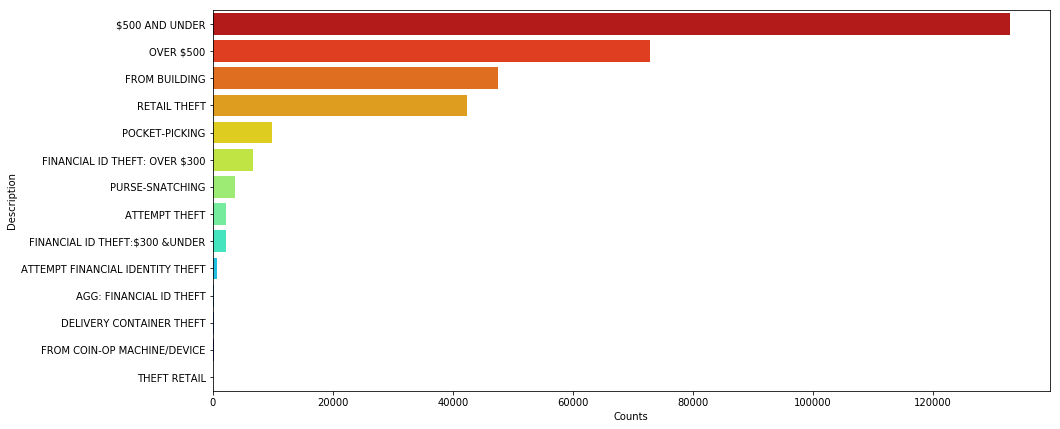

In [43]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_theft_data, palette="jet_r")

In [44]:
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(), "month" : df_theft["Month"].value_counts().index}, index = range(12))
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])
theft_in_months.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,thefts,month
9,29039.0,1
11,25791.0,2
10,28556.0,3
8,31238.0,4
5,27630.0,5


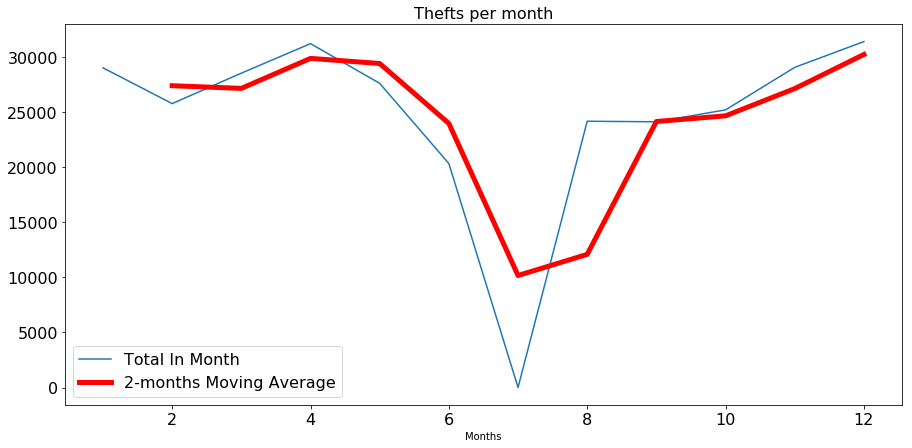

In [46]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [47]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))


2016-12-31 23:59:00
2012-01-01 00:00:00


In [48]:
df_theft_dates = df_theft['Location']
df_theft_dates.index = df_theft['Date']
resampled = df_theft_dates.resample('D')
df_theft_dates['MEAN'] = resampled.size().mean()
df_theft_dates['STD'] = resampled.size().std()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Dell\Anaconda3\

In [49]:
UCL = df_theft_dates['MEAN'] + 3 * df_theft_dates['STD']
LCL = df_theft_dates['MEAN'] -  3 * df_theft_dates['STD']

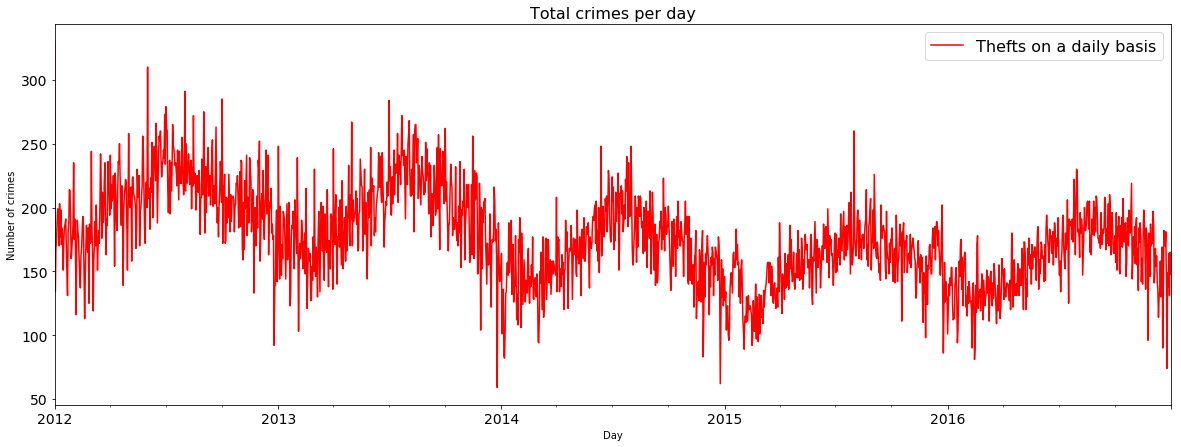

In [50]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
# plt.plot(y = UCL,x = resampled.index, color='red', ls='--', linewidth=1.5, label='UCL')

# LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
# df_theft_dates['MEAN'].plot(color='red', linewidth=2, label='Average')

plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [51]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

,Counts,Description
0,9893,RECKLESS CONDUCT
1,728,BOMB THREAT
2,598,ARSON THREAT
3,558,OTHER VIOLATION
4,507,FALSE POLICE REPORT


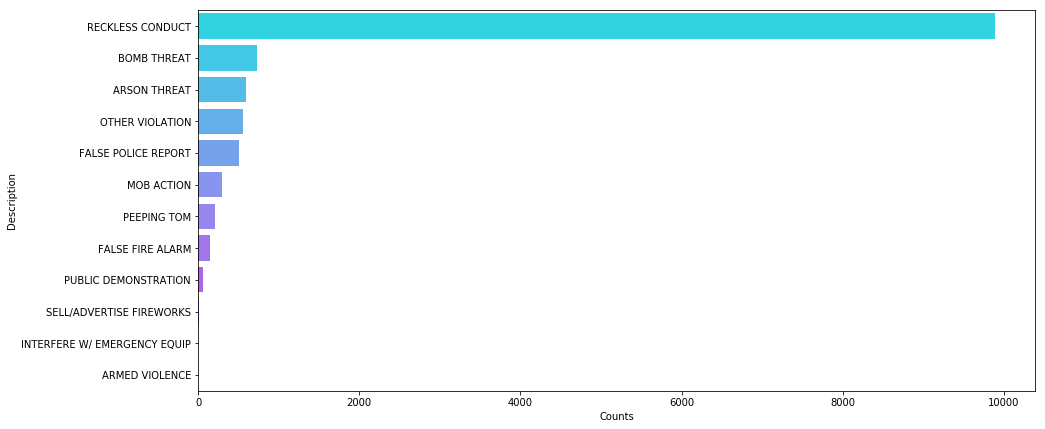

In [52]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

In [53]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [54]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

,Raw_String,ValueCount
0,"(41.754168689, -87.601635756)",54
1,"(41.78210152, -87.586502002)",54
2,"(41.946542477, -87.736084376)",50
3,"(41.807650669, -87.643080489)",48
4,"(41.73365047, -87.557845321)",39


In [55]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [56]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],  zoom_start=13)

In [57]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3
    
    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [58]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_pp)

In [59]:
chicago_crime_pp

In [60]:
df

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,05/03/2016 10:35:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,44.0,2016,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,05/03/2016 10:30:00 PM,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,35.0,2016,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,05/03/2016 09:30:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,38.0,2016,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,1.0,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,05/03/2016 10:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,67.0,2016,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [61]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner',
                    zoom_start=13)
stamen.save(path='stamen_toner.html')

TypeError: save() missing 1 required positional argument: 'outfile'

In [ ]:
import folium
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')
map_1.Simple_Marker([45.3288, -121.6625], popup='Mt. Hood Meadows').add_to(map_1)
map_1.simple_marker([45.3311, -121.7113], popup='Timberline Lodge')
map_1.create_map(path='mthood.html')

In [ ]:
map_osm=folium.Map(location=[50.4547,30.5238], zoom_start=6, tiles='Stamen Terrain')
folium.Marker([45.463612, 29.294559], popup='Solar Power Station').add_to(map_osm)

map_osm.save('spst.html')